In [1]:
from tidyverse.dummy import *
import scanpy as sc
from sctools import pipeline
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

import sys
sys.path.append('..')
from util import load_fitzgerald2023, load_fitzgerald2023_fibroblasts

Importing tidyverse


# Fibroblasts, as extracted by the authors

downlaod from https://cellxgene.cziscience.com/collections/a18474f4-ff1e-4864-af69-270b956cee5b

In [2]:
adata = load_fitzgerald2023_fibroblasts()
adata.raw = adata

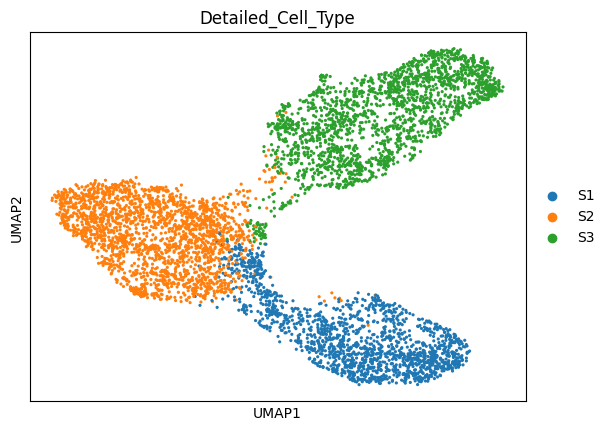

In [3]:
sc.pl.umap(adata, color=['Detailed_Cell_Type'], show=False)
plt.savefig(f'./umap_S1S2S3.png')

In [4]:
d = {
    'Universal': ['PI16', 'SLPI', 'MFAP5'],
    'Gastric': ['POSTN',  'PXDN'], #'F3',
    'Eso': ['COL6A1', 'NTM','APCDD1'],
    'Perictye': ['COL1A1', 'COL4A1',  'CD36', 'RGS5'],  # 'RGS5', RGS5_ENSG00000143248
     'other myo': ['CCL2', 'CXCL12', 'CCL21'],
    'VSMC': ['TAGLN', 'MYH11', 'MYL9']
}

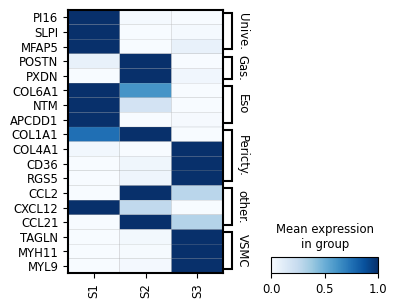

In [5]:
sc.pl.matrixplot(adata, var_names=d , groupby='Detailed_Cell_Type', standard_scale='var', swap_axes=True, show=False, #order=cluster_order
                figsize=(4,3), cmap='Blues');

# set_matplotlib_formats('svg')
plt.savefig(f'./S1_S2_S3_markers_matrix.svg')
# set_matplotlib_formats('png')

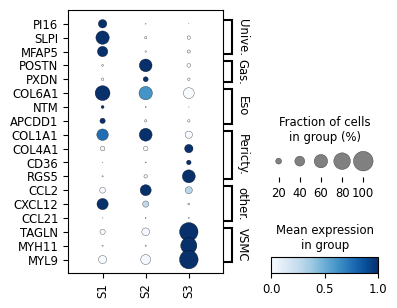

In [6]:
sc.pl.dotplot(adata, var_names=d , groupby='Detailed_Cell_Type', standard_scale='var', swap_axes=True, show=False, #order=cluster_order
                figsize=(4,3), cmap='Blues');

<Figure size 1000x1000 with 0 Axes>

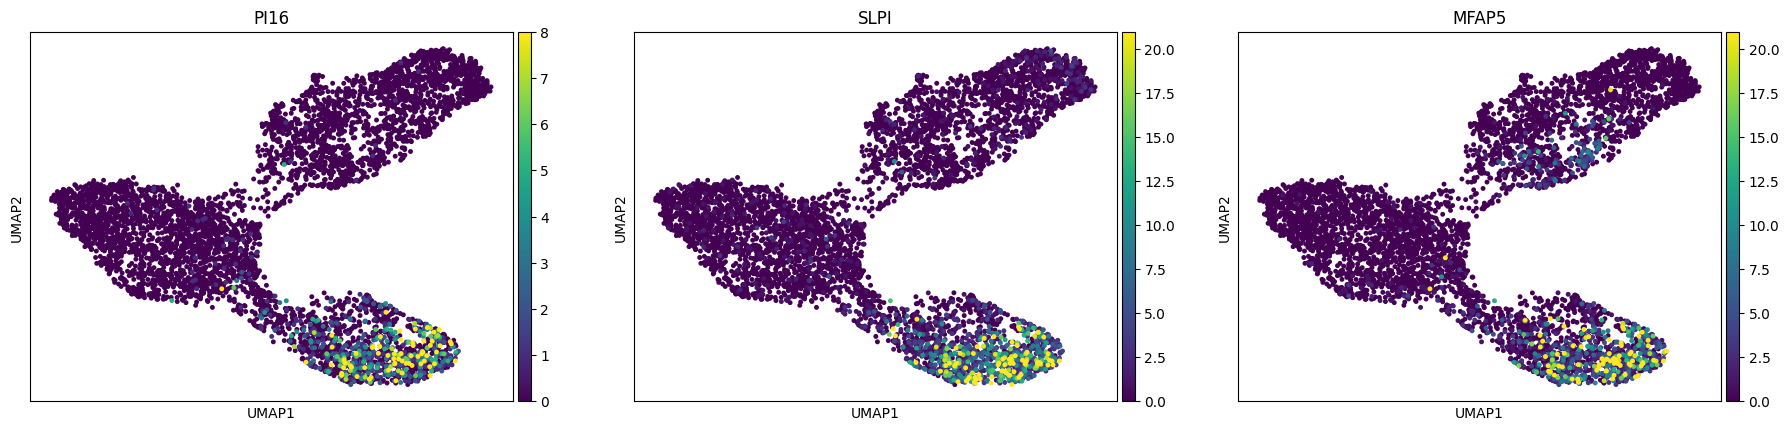

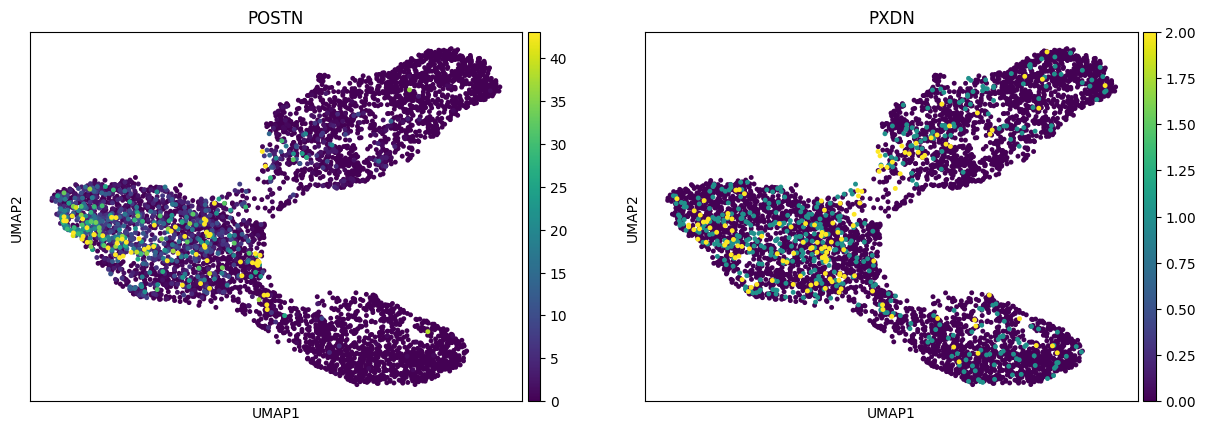

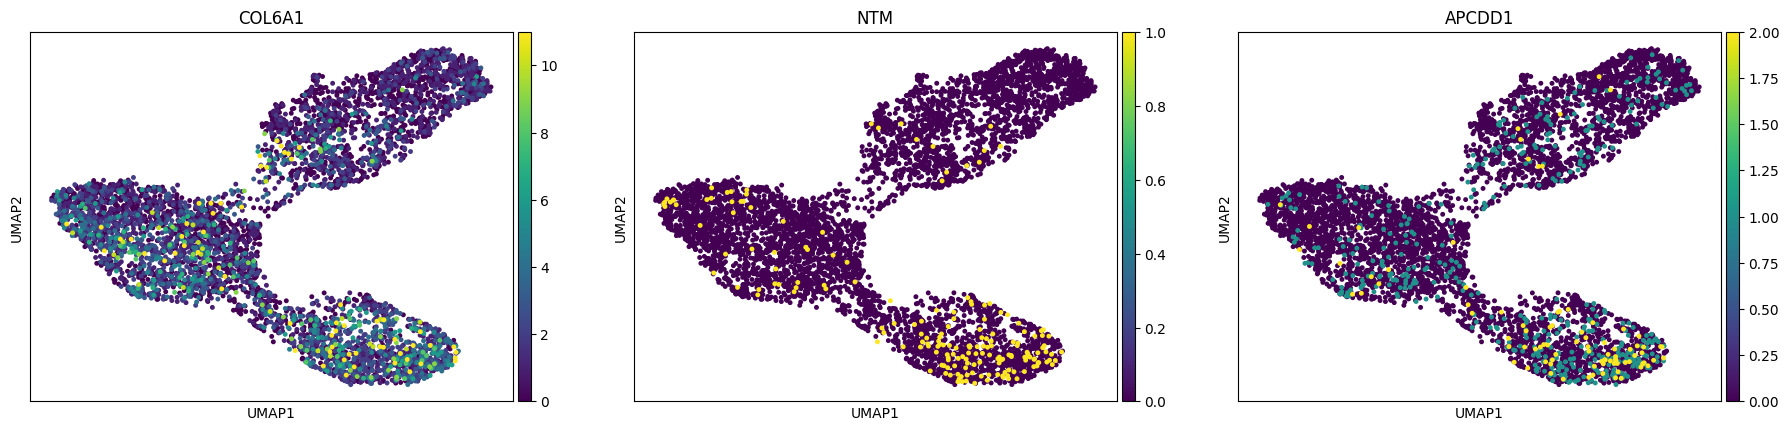

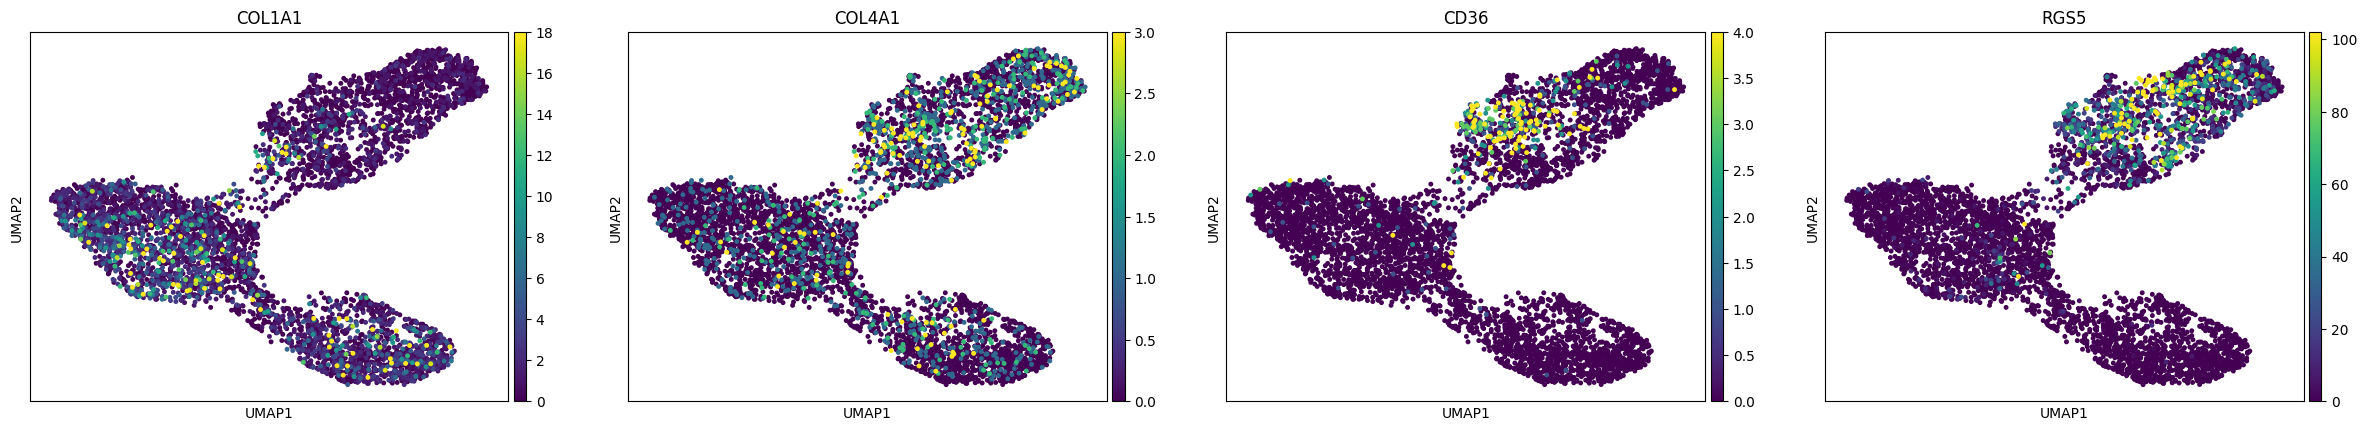

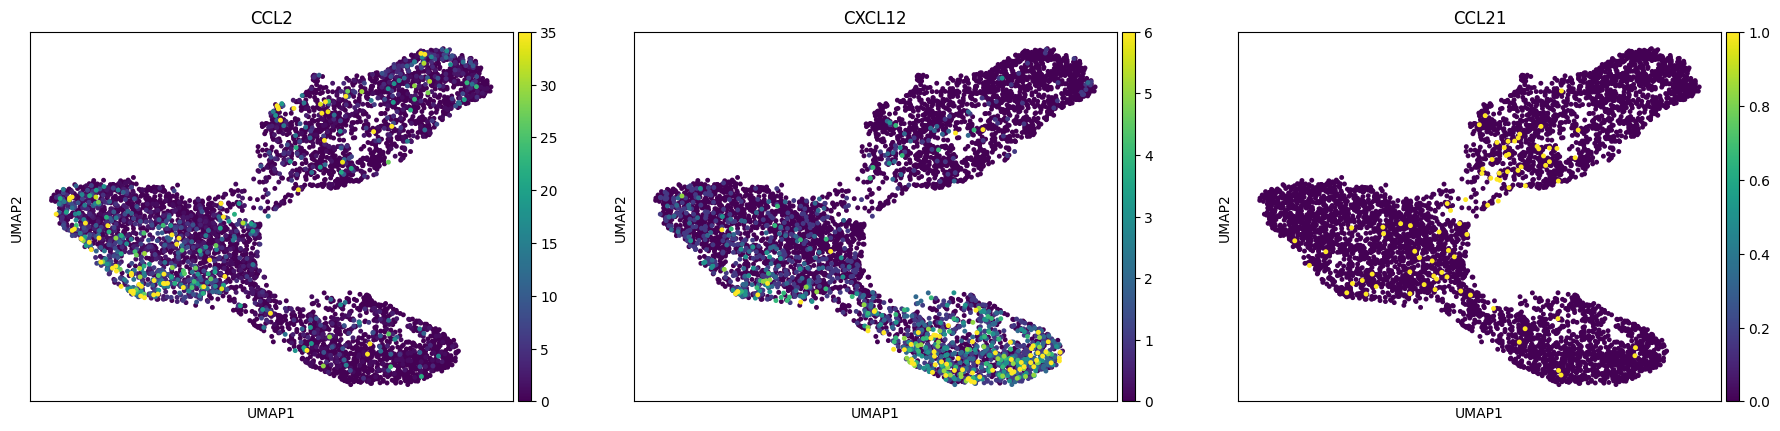

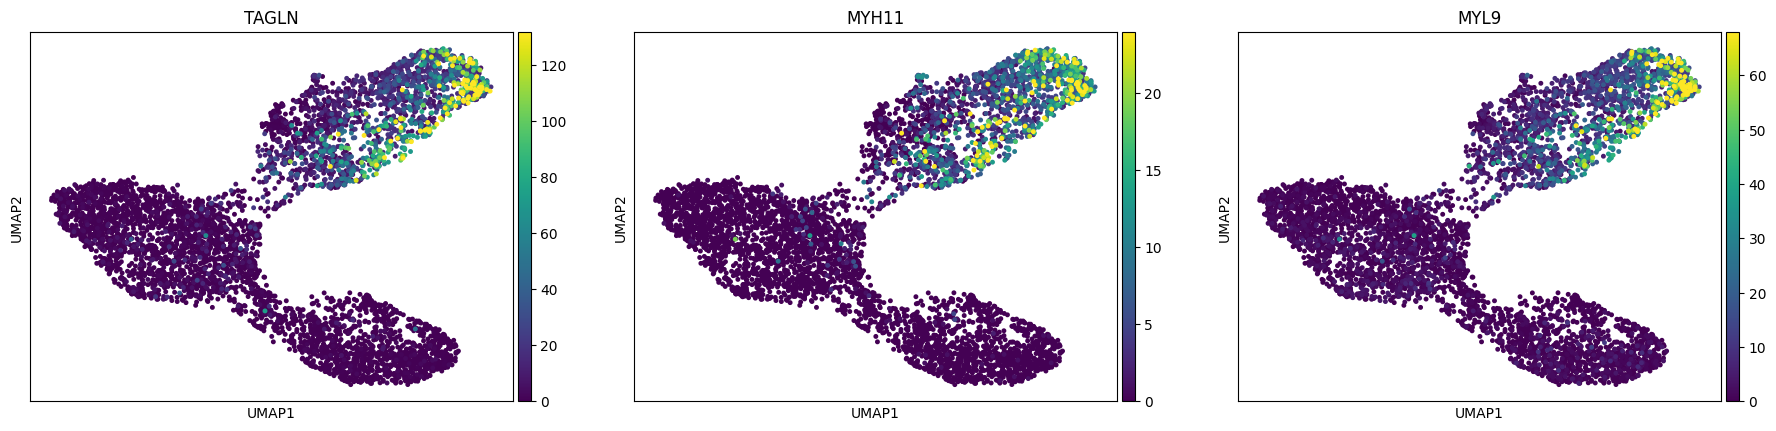

In [7]:
genes = []
for v in d.values():
    genes.extend(v)
    
    
def get_gene_percentile(adata, gene):
    return int(np.percentile(adata.raw[:, gene].X.toarray(), 99))
    
plt.figure(figsize=(10,10))
for name, markers in d.items(): 
    sc.pl.umap(
        adata, 
        color=markers, 
        vmax=[get_gene_percentile(adata, _) for _ in markers],
        size=50,
        ncols=len(markers), 
        show=False
    )
    # plt.savefig(f'./umap_markers_{name}.png')
